## Практика 28 сентября

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler
plt.style.use("bmh")
plt.rcParams['font.family'] = 'DejaVu Sans'

In [4]:
def Logistic_model(time, delta_t, c, Pm, previous):
  for i in range(len(previous), time + 1):
    previous.append(max(previous[-1] * (1 + c * delta_t * (Pm - previous[-1])) ,0))
  return np.array(previous)


In [5]:
years = 130
delta_t = 10
c = 1.25e-9
Pm = 25e6 
Pa = [3e6]
res = Logistic_model((int)(years / delta_t), delta_t, c, Pm, Pa)
years_grid = [delta_t * i for i in range((int)(years / delta_t) + 1)]

In [6]:
Pobs = [3.0000, 3.2276, 4.5759, 6.9570, 8.7618, 9.1536, 11.2669, 14.5153, 16.5059, 17.9563, 19.5078]
Pobs = np.array([val * 10**6 for val in Pobs])

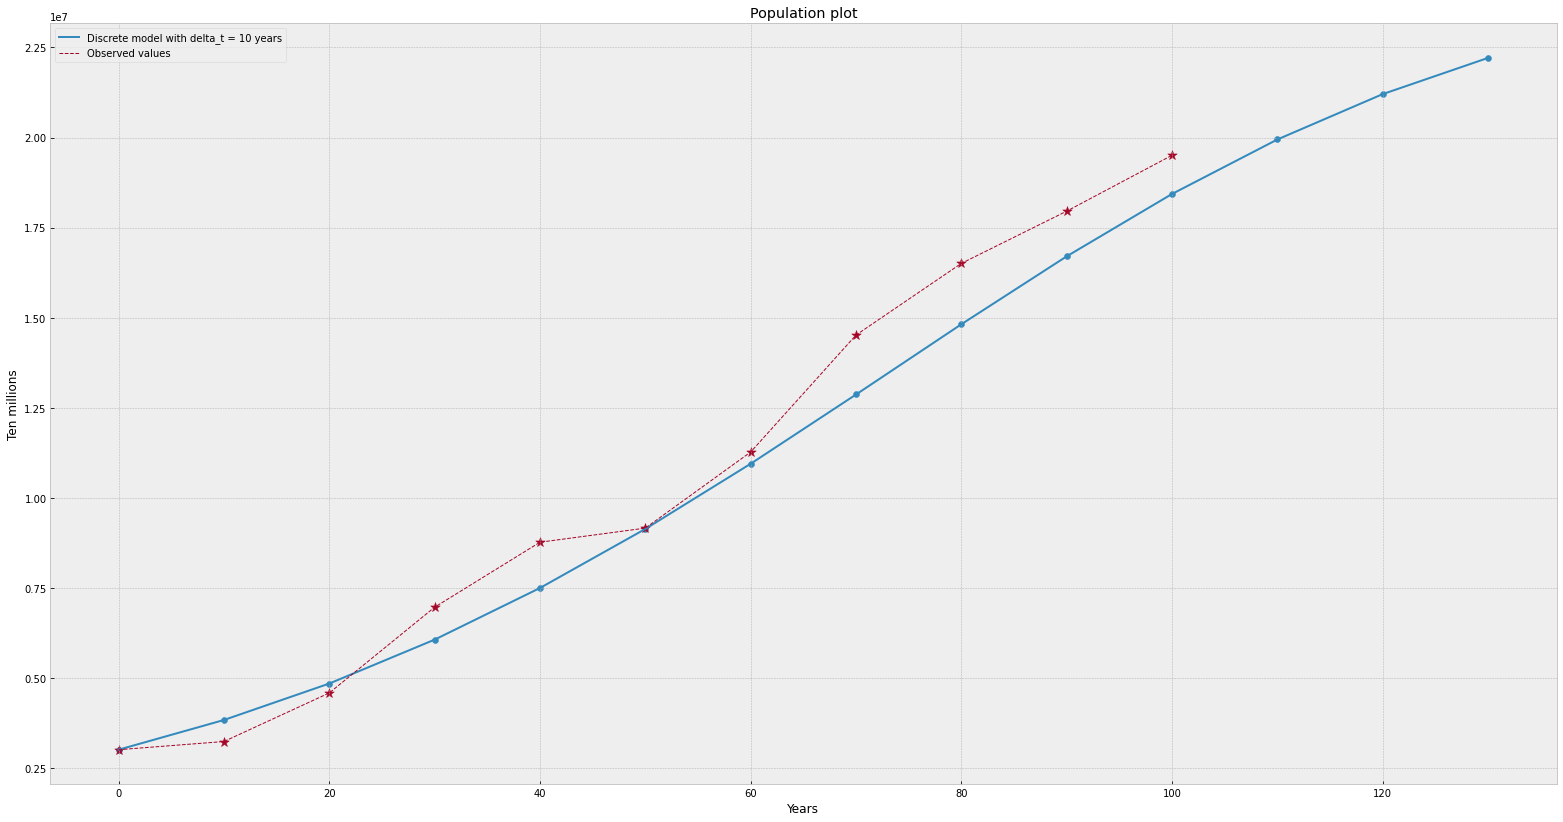

In [7]:
plt.figure(figsize = (27, 14))
plt.title('Population plot')
plt.plot(years_grid, res)
plt.plot(years_grid[:len(Pobs)], Pobs, linestyle = '--', linewidth = 1)
plt.scatter(years_grid, res)
plt.scatter(years_grid[:len(Pobs)], Pobs, marker = '*', s = 100)
plt.legend(['Discrete model with delta_t = 10 years', 'Observed values'])
plt.ylabel('Ten millions')
plt.xlabel('Years')
plt.show()

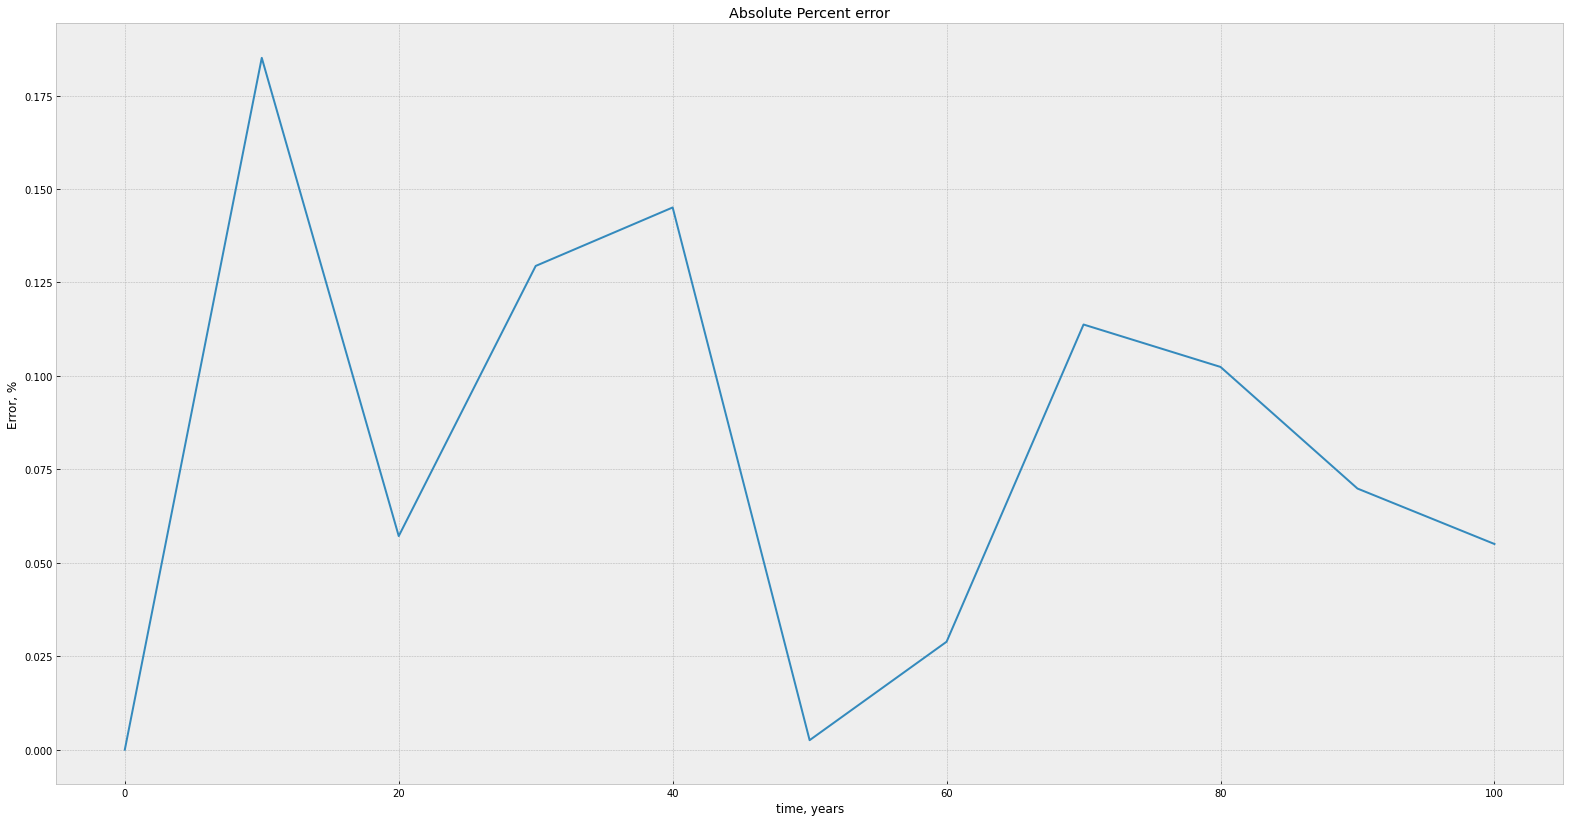

In [8]:
plt.figure(figsize = (27, 14))
plt.title('Absolute Percent error')
plt.plot(years_grid[:len(Pobs)], np.abs(res[:len(Pobs)] - Pobs) / Pobs)
plt.ylabel('Error, %')
plt.xlabel('time, years')
plt.show()

In [9]:
Pa = [[5 * i * 10**6] for i in range(1, 11)]
years = 200
years_grid = [delta_t * i for i in range((int)(years / delta_t) + 1)]
for i in range(0, 10):
  Pa[i]  = Logistic_model((int)(years / delta_t), delta_t, c, Pm, Pa[i])

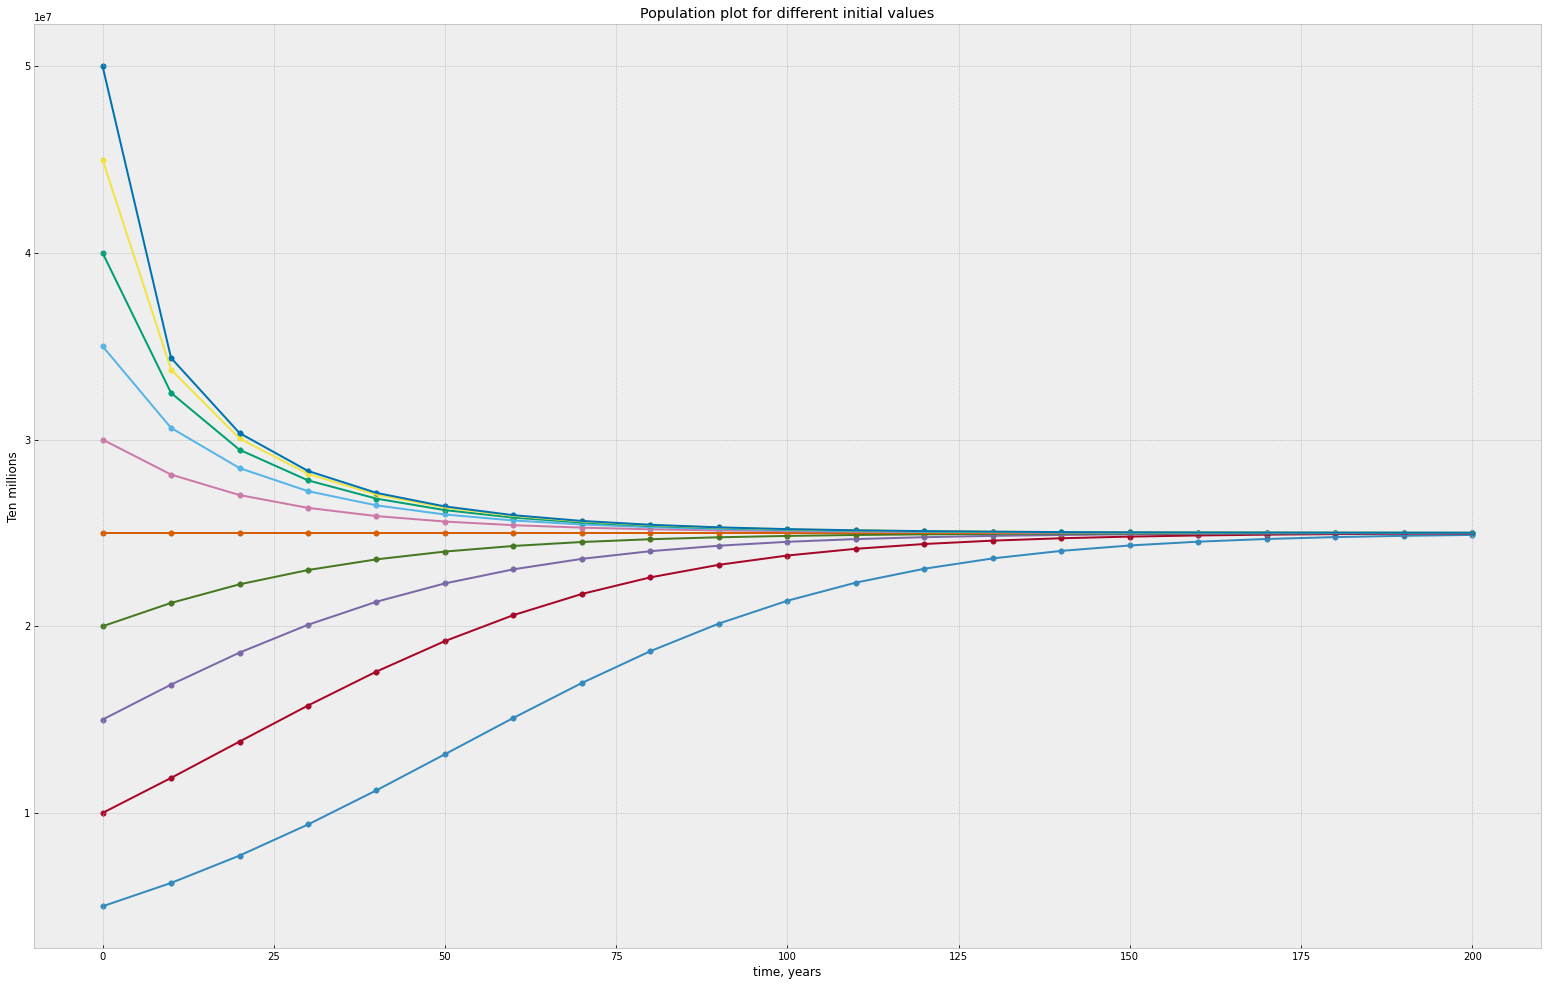

In [10]:
plt.figure(figsize = (27, 17))
plt.title('Population plot for different initial values')
for i in range(10):
  plt.plot(years_grid, Pa[i])
  plt.scatter(years_grid, Pa[i], s = 30)
#plt.legend(['Discrete model with delta_t = 10 years', 'Observed values'])
plt.ylabel('Ten millions')
plt.xlabel('time, years')
plt.show()

## Дз на 4 сентября

Модель второго порядка

$P_{A}(n + 1) = P_{A}(n - 1) + 2 \Delta t c P_{A}(n)(P_{m} - P_{A}(n))$

In [11]:
def Logistic_model_second_order(time, delta_t, c, Pm, previous):
  assert(len(previous) >= 2)
  for i in range(len(previous), time + 1):
    previous.append(max(previous[-2] + 2 * delta_t * c * previous[-2] * (Pm - previous[-2]) ,0))
  return np.array(previous)


In [12]:
years = 130
delta_t = 10
c = 1.25e-9
Pm = 25e6 
Pa = [3e6, 32276e2]
res1 = Logistic_model((int)(years / delta_t), delta_t, c, Pm, Pa)
res2 = Logistic_model_second_order((int)(years / delta_t), delta_t, c, Pm, Pa)

years_grid = [delta_t * i for i in range((int)(years / delta_t) + 1)]



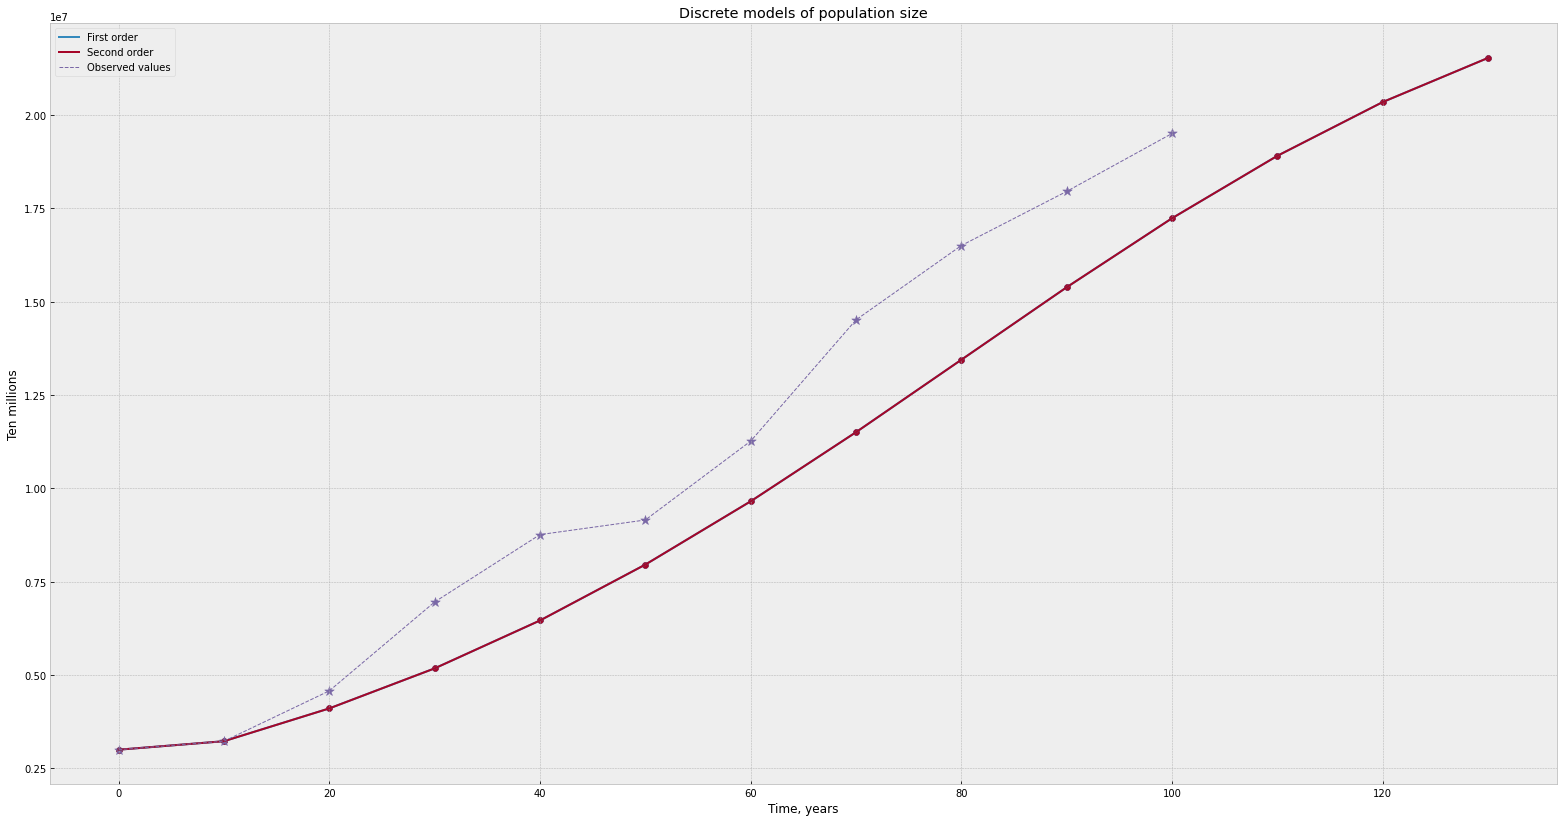

In [13]:
plt.figure(figsize = (27, 14))
plt.title('Discrete models of population size')
plt.plot(years_grid, res1)
plt.plot(years_grid, res2)
plt.plot(years_grid[:len(Pobs)], Pobs, linestyle = '--', linewidth = 1)
plt.scatter(years_grid, res1)
plt.scatter(years_grid, res2)
plt.scatter(years_grid[:len(Pobs)], Pobs, marker = '*', s = 100)
plt.legend(['First order', 'Second order','Observed values'])
plt.ylabel('Ten millions')
plt.xlabel('Time, years')
plt.show()

# 1.11 (a)

In [14]:
Pa = [[3e6], [2.22e7]]
time = 1
accuracy = 0.98
while(Pa[0][-1] <= 0.98 * Pm):
  time += 1
  Logistic_model(time, delta_t, c, Pm, Pa[0])
time = 1
while(Pa[1][-1] <= 0.98 * Pm):
  time += 1
  Logistic_model(time, delta_t, c, Pm, Pa[1])

In [15]:
print("С начальным значением {0:1.0f} миллиона требуется ".format(Pa[0][0] / 1e6), (len(Pa[0]) - 1) * delta_t, "лет.")
print("С начальным значением {0:1.0f} миллиона требуется ".format(Pa[1][0] / 1e6), (len(Pa[1]) - 1) * delta_t, "лет.")

С начальным значением 3 миллиона требуется  180 лет.
С начальным значением 22 миллиона требуется  50 лет.


## 1.11 (b)

In [18]:
print("По теоретической формуле начальным значением {0:1.0f} миллиона требуется 189 лет".format(Pa[0][0] / 1e6))
print("По теоретической формуле начальным значением {0:1.0f} миллиона требуется 61 лет".format(Pa[1][0] / 1e6))

По теоретической формуле начальным значением 3 миллиона требуется 189 лет
По теоретической формуле начальным значением 22 миллиона требуется 61 лет


1.11 (c)

In [20]:
def growth_rate(P, c, Pm):
  return c * (Pm - P)

In [32]:
years_grid = [25 * i for i in range(5)]
P = [3e6]
delta_t = 5
res = Logistic_model((int)(years_grid[-1] / delta_t), delta_t, c, Pm, P)
growth = [growth_rate(res[(int)(year / delta_t)], c, Pm) for year in years_grid] 

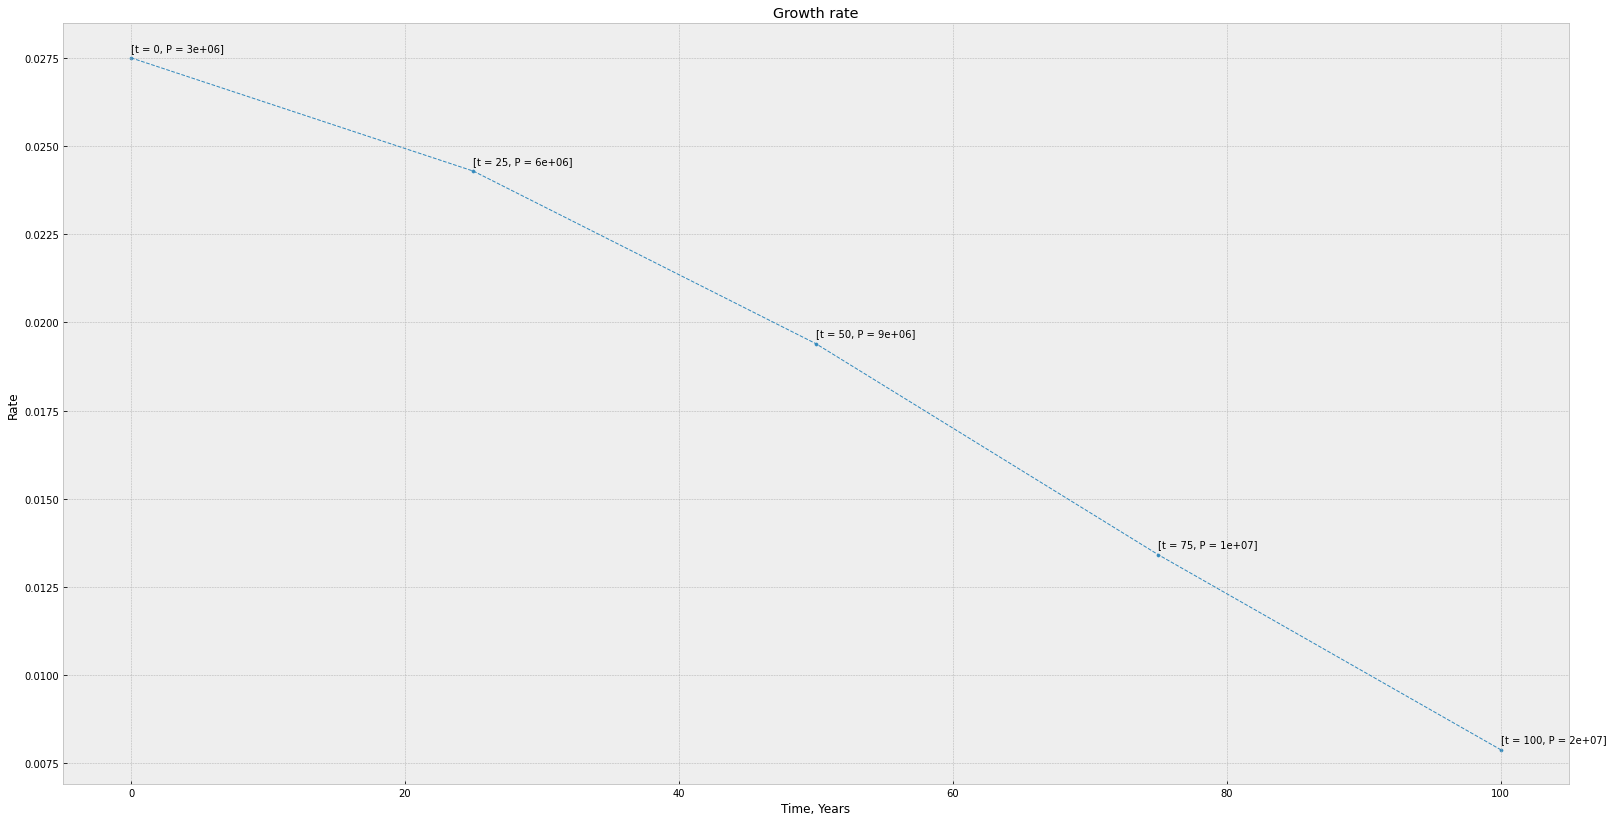

In [64]:
plt.figure(figsize = (27, 14))
plt.title('Growth rate')
for i, year in enumerate(years_grid):
  plt.text(year, growth[i] + 0.0002, '[t = {0}, P = {1:1.0e}]'.format(year, P[(int)(year / delta_t)]))
plt.plot(years_grid, growth, linestyle = '--', linewidth = 1)
plt.scatter(years_grid, growth, s = 10)
plt.ylabel('Rate')
plt.xlabel('Time, Years')
plt.show()

1.11 (d)